In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
import scipy
import math as m
import cmath
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
plt.switch_backend('TkAgg')


PROJECT_CWD = r"/workspace/"
sys.path.append(PROJECT_CWD)

from my_packages.neural_network.data_generators.magnetic_array_generator import RandomMagneticDipoleGenerator
from my_packages.neural_network.data_generators.iterator import DataIterator

# torch import 
import torch
from torch.utils.data import TensorDataset, DataLoader

print("cuda available: ", torch.cuda.is_available())
print("number of GPUs: ",torch.cuda.device_count())
print("I am currently using device number: ", torch.cuda.current_device())
print("the device object is: ", torch.cuda.device(0))
print("the device name is: ", torch.cuda.get_device_name(0))


# set all the seeds
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

cuda available:  True
number of GPUs:  1
I am currently using device number:  0
the device object is:  <torch.cuda.device object at 0x7fc21b95f850>
the device name is:  NVIDIA T600 Laptop GPU


In [94]:
from my_packages.classes.dipole_fields import DFHandler_over_Substrate, InfCurrentLoop_with_Substrate, InfElectricDipole_with_Substrate
from my_packages.classes.model_components import Substrate, UniformEMSpace
from my_packages.classes.dipole_array import FlatDipoleArray

# set up the substrate
substrate_thickness = 1.6e-3
substrate_epsilon_r = 4.4
substrate = Substrate(1,1,substrate_thickness, "name", substrate_epsilon_r)

# set up the simulation space
r = np.meshgrid(np.linspace(-0.5, 0.5, 50), np.linspace(-0.5, 0.5, 50), [1e-2], indexing="ij")
EM_space = UniformEMSpace(r=r)

f = [1e9]
height = 1e-4
r0 = np.array([[0,0]])
orientations = [[0,0]]
M = np.array([1])

power = np.random.normal(2, 0.3)
scale_E = 5**power

eps0 = 8.8541878128e-12
mu0 = 1.25663706212e-6

dipole_arrayH = FlatDipoleArray(
    r0=r0,
    orientations=orientations,
    moments=M,
    height=height,
    type="Magnetic",
    f=f
)

dipole_arrayE = FlatDipoleArray(
    r0=r0,
    orientations=orientations,
    moments=M*scale_E,
    height=height,
    type="Electric",
    f=f
)


dfh_H = InfCurrentLoop_with_Substrate(substrate=substrate, EM_space=EM_space, dipole_array=dipole_arrayH, use_magnetic_charge_moments=False)
dfh_E = InfElectricDipole_with_Substrate(substrate=substrate, EM_space=EM_space, dipole_array=dipole_arrayE)


{'ax': <Axes: title={'center': 'E field - Z Component Magnitude'}, xlabel='X [mm]', ylabel='Y [mm]'>,
 'cs': <matplotlib.contour.QuadContourSet at 0x7fcb57880610>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fcb578fb6a0>}

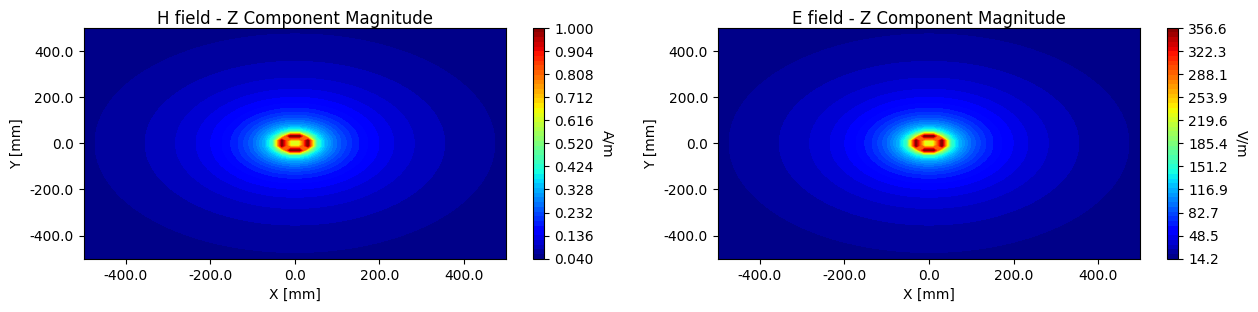

In [95]:
%matplotlib inline
H = dfh_H.evaluate_H(method="uniform space").run_scan(field_type="H")
E = dfh_E.evaluate_E(method="uniform space").run_scan(field_type="E")

maxH = np.max(H.scan)

fig, ax = plt.subplots(1,2, figsize=(15,3))

(H/maxH).run_scan(field_type="H").plot(ax=ax[0])
(E/maxH).run_scan(field_type="E").plot(ax=ax[1])

In [11]:
H = dfh_H.evaluate_H(method="uniform space").run_scan(field_type="H")
E = dfh_E.evaluate_E(method="uniform space").run_scan(field_type="E")

maxH = np.max(H.scan)
Hn = H/maxH

Hn

Scan with shape (50, 50) and frequency 1000000000.0

In [64]:
power = np.random.normal(2.5, 1)
scale_E = 5**power

scale_E

17.549934558573177

In [26]:
dfh_E.evaluate_E(method="uniform_space")